In [1]:
import numpy as np
import pandas as pd
df_diamond = pd.read_csv('diamonds.csv')
df_diamond.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df_diamond.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [3]:
df_num = df_diamond.select_dtypes(include=np.number)
df_cat = df_diamond.select_dtypes(include='object')


In [4]:
df_diamond.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [5]:
df_cat.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [6]:
import seaborn as sns
#sns.heatmap(df_num,annot=True);

In [7]:
df_diamond.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [8]:
df_diamond.shape

(53940, 11)

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
df_num = df_diamond.select_dtypes(include=np.number).drop('price',axis=1)
vif['VIF'] = [variance_inflation_factor(df_num.values,i) for i in range(df_num.shape[1])]
vif['Features'] = df_num.columns
vif.sort_values('VIF',ascending=False).head()

,VIF,Features
4,1289.143397,x
6,542.547978,z
5,531.018084,y
2,527.647491,depth
3,502.126566,table


In [13]:
df_num1 = df_num.copy()
for i in range(len(df_num1.columns)):
    vif = pd.DataFrame()
    vif['VIF'] = [variance_inflation_factor(df_num1.values,i) for i in range(df_num1.shape[1])]
    vif['features'] = df_num1.columns
    new = vif[vif['VIF']>3]
    if (new.empty==False):
        df_sort = new.sort_values('VIF',ascending=False)
    else:
        print(vif)
        break
    if (df_sort.empty==False):
        df_num1 = df_num1.drop(df_sort.features.iloc[0],axis=1)
    else:
        print(vif)

        VIF    features
0  1.724023  Unnamed: 0
1  1.724023       carat


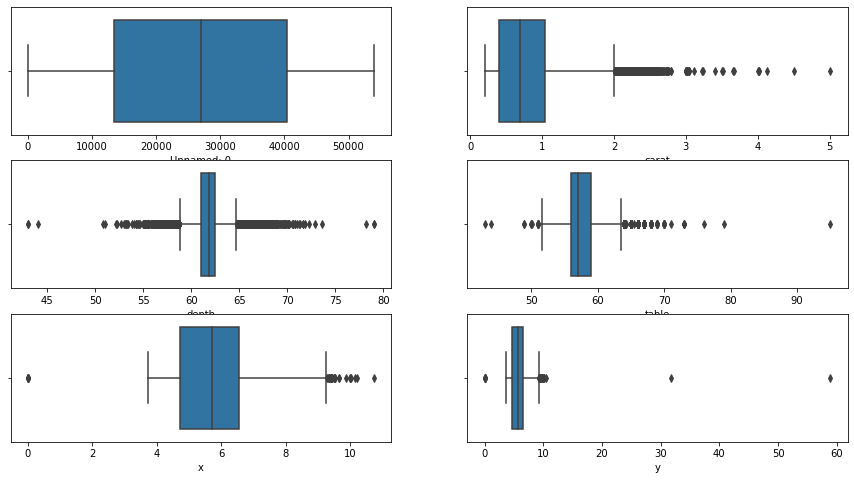

In [22]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
fig,ax = plt.subplots(3,2,figsize=(15,8))


for var,subplot in zip(df_num.columns,ax.flatten()):
    z=sns.boxplot(df_num[var],ax=subplot);
plt.show();

In [24]:
q1 = df_diamond.quantile(0.25)
q3 = df_diamond.quantile(0.75)
iqr = q3-q1
ll = q1-1.5*iqr
ul = q3+1.5*iqr
df_new = df_diamond[~((df_diamond<ll) | (df_diamond > ul)).any(axis=1)].reset_index(drop=True)

In [23]:
df_diamond.shape

(53940, 11)

In [25]:
df_new.shape

(47524, 11)

In [26]:
df_num = df_new.select_dtypes(include=np.number)
df_cat = df_new.select_dtypes(include='object')

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc=StandardScaler()
scaled = pd.DataFrame(sc.fit_transform(df_num),columns=df_num.columns)
dummies = pd.get_dummies(df_cat,drop_first=True)
df_dia = pd.concat([scaled,dummies],axis=1)

In [31]:
df_dia.head()

,Unnamed: 0,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.701457,-1.289950,-0.259076,-1.118057,-1.012363,-1.629414,-1.613461,-1.647072,0,1,...,0,0,0,0,0,1,0,0,0,0
1,-1.701394,-1.343844,-1.796287,1.849991,-1.012363,-1.690645,-1.757201,-1.845043,0,0,...,0,0,0,0,1,0,0,0,0,0
2,-1.701269,-1.128269,0.554741,0.365967,-1.009454,-1.374285,-1.356782,-1.317122,0,0,...,0,1,0,0,0,0,0,1,0,0
3,-1.701207,-1.074375,1.368559,0.365967,-1.009090,-1.231412,-1.233576,-1.119152,1,0,...,0,0,1,0,0,1,0,0,0,0
4,-1.701144,-1.263003,0.916438,-0.128708,-1.008726,-1.639619,-1.633995,-1.564585,0,0,...,0,0,1,0,0,0,0,0,0,1


In [33]:
from sklearn.model_selection import train_test_split
x = df_dia.drop('price',axis=1)
y = df_dia['price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [35]:
import statsmodels.api as sm
base_model = sm.OLS(y,x).fit()
print(base_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.923
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                          2.377e+04
Date:                Sun, 21 Nov 2021   Prob (F-statistic):                        0.00
Time:                        11:08:54   Log-Likelihood:                         -6469.6
No. Observations:               47524   AIC:                                  1.299e+04
Df Residuals:                   47500   BIC:                                  1.320e+04
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [36]:
p_val = pd.DataFrame()
p_val['P val'] = base_model.pvalues
p_val[p_val['P val']<0.05]

,P val
Unnamed: 0,1.335742e-07
carat,0.000000e+00
table,2.691518e-56
x,2.101753e-76
y,9.157126e-46
z,1.117830e-25
cut_Good,0.000000e+00
cut_Ideal,0.000000e+00
cut_Premium,0.000000e+00
cut_Very Good,0.000000e+00


In [37]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr_rfe = sfs(estimator=lr,forward=True,k_features='best',scoring='r2')
lr_rfe_model = lr_rfe.fit(x_train,y_train)
print(lr_rfe_model.k_feature_names_)
print(lr_rfe_model.k_score_)

('Unnamed: 0', 'carat', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2')
0.927006328954667


In [38]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr_rfe = sfs(estimator=lr,forward=False,k_features='best',scoring='r2')
lr_rfe_model = lr_rfe.fit(x_train,y_train)
print(lr_rfe_model.k_feature_names_)
print(lr_rfe_model.k_score_)

('Unnamed: 0', 'carat', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2')
0.927006328954667


In [39]:
from sklearn.feature_selection import RFE
lr = LinearRegression()
rfe_model = RFE(estimator=lr,n_features_to_select=10)
rfe_model  = rfe_model.fit(x_train,y_train)
feat_index = pd.Series(rfe_model.ranking_,index=x_train.columns)
feat_index[feat_index==1]

carat           1
x               1
color_J         1
clarity_IF      1
clarity_SI1     1
clarity_SI2     1
clarity_VS1     1
clarity_VS2     1
clarity_VVS1    1
clarity_VVS2    1
dtype: int32

In [44]:
signi = list(lr_rfe_model.k_feature_names_)
x_train_new = x_train[signi]
x_test_new = x_test[signi]
new_model = sm.OLS(y_train,sm.add_constant(x_train_new)).fit()
print((new_model.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                 1.842e+04
Date:                Sun, 21 Nov 2021   Prob (F-statistic):               0.00
Time:                        11:14:02   Log-Likelihood:                -3470.9
No. Observations:               33266   AIC:                             6990.
Df Residuals:                   33242   BIC:                             7192.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.9833      0.023    -42.983

In [41]:
lr = LinearRegression()
lr_model = lr.fit(x_train_new,y_train)
lr_model.score(x_train_new,y_train)

0.9272424468557907

In [45]:
y_pred_test = lr_model.predict(x_test_new)

In [50]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test,y_pred=y_pred_test)

0.9264183634336015

In [47]:
y_pred_train = lr_model.predict(x_train_new)

In [52]:
from sklearn.metrics import r2_score
r2_score(y_true=y_train,y_pred=y_pred_train)

0.9272424468557907

In [53]:
res=y_train-y_pred_train

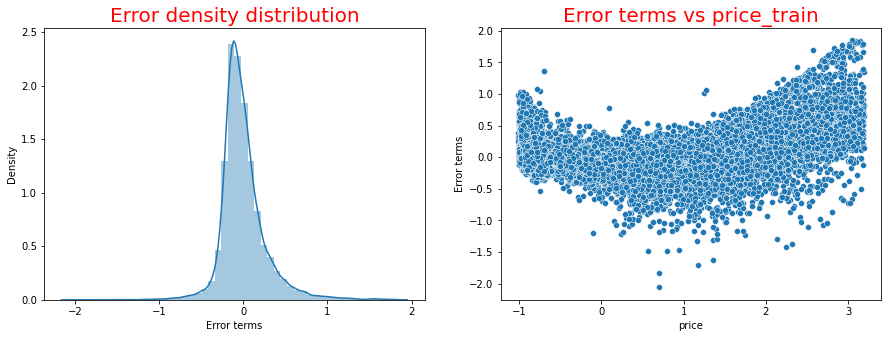

In [54]:
plt.figure(figsize=(15,5))
ax1=plt.subplot(121)
sns.distplot(res,ax=ax1)
plt.title("Error density distribution",fontdict={"fontsize":20,"fontweight":-0.5,"color":"Red"})
plt.xlabel("Error terms")
ax2=plt.subplot(122)
sns.scatterplot(x=y_train,y=res,ax=ax2)
plt.title("Error terms vs price_train",fontdict={"fontsize":20,"fontweight":-0.5,"color":"Red"})
plt.ylabel("Error terms")
plt.show()

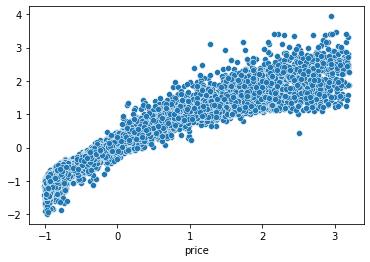

In [56]:
sns.scatterplot(y_test,y_pred_test);